# <font color='#ff7B01'>Assignment 5 - Neural Network Type Classification | TMNIST</font>

## **<font color='#ff7B01'>About the dataset**

TMNIST-Glyphs, also referred to as Typography MNIST (TMNIST), stands out as an extensive and intricate dataset comprising over 500,000 images meticulously crafted in the style reminiscent of MNIST glyphs. Within this expansive collection, one can discover a remarkable diversity encompassing 1,812 distinct glyphs, each meticulously presented across an impressive array of 2,990 unique font styles.

Contained within a singular CSV file, the dataset is meticulously structured to facilitate seamless exploration and analysis:

* At the forefront, the header row serves as a guiding beacon, delineating essential columns vital for comprehension and analysis. These columns include 'font_name', 'glyph_name', 'label', and a sequence of subsequent columns housing pixel values.
* 'font_name' serves as a gateway to diverse typographical expressions, housing references to font files ranging from the elegant 'Acme-Regular' to the bold 'ZillaSlab-Bold', each contributing a unique flavor to the glyph presentations.
* Delving deeper into the dataset, 'glyph_name' emerges as a repository of Unicode intricacies, meticulously capturing the essence of each glyph with precision. From the stately 'LATIN CAPITAL LETTER A' to the complex 'DEVANAGARI LETTER AA', every glyph finds its distinct identity within this column.
* In instances where glyphs extend beyond the confines of a single Unicode character, the 'glyph_name' gracefully merges individual character identities with a '+' symbol, thus encapsulating the essence of complex representations. For instance, the glyph 'अं' finds its expression through the fusion of 'DEVANAGARI LETTER A' and 'DEVANAGARI SIGN ANUSVARA'.
* As the dataset unfolds, the 'label' column emerges as a testament to the rich tapestry of symbols and letters present within the glyph repertoire. Spanning a diverse spectrum encompassing symbols like 'ش', letters like 'E', or characters like 'छ', this column serves as a guidepost, illuminating the semantic significance of each image.
* Finally, the dataset culminates in a symphony of pixel values, intricately woven across 784 columns. Each pixel bears the weight of visual representation, meticulously sculpting the images corresponding to each character within the specified 'font_name' and font style.

This treasure trove of data stands as a cornerstone within the realm of computational creativity and cognitive type analysis, offering researchers and enthusiasts alike a canvas upon which to explore the intricate nuances of typographical expression. Through TMNIST-Glyphs, the journey of discovery continues, paving the way for new insights and revelations within the realm of visual representation and symbolic communication.

## **<font color='#ff7B01'>Importing the dataset into our directory**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tmnist-glyphs-1812-characters/Glyphs_TMNIST_updated.csv


## **<font color='#ff7B01'>Importing the required libraries for our model**

In [2]:
# Importing matplotlib for data visualization
import matplotlib
import matplotlib.pyplot as plt

# Importing seaborn for enhanced data visualization
import seaborn as sns

# Importing train_test_split from sklearn.model_selection to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Importing accuracy_score from sklearn.metrics to evaluate model performance
from sklearn.metrics import accuracy_score

# Importing TensorFlow for building and training neural networks
import tensorflow

# Importing Sequential model from tensorflow.keras.models for building sequential models
from tensorflow.keras.models import Sequential

# Importing layers from tensorflow.keras.layers for defining different types of layers in the neural network
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, ReLU

# Importing to_categorical from tensorflow.keras.utils to one-hot encode target labels
from tensorflow.keras.utils import to_categorical

# Importing plot_model from tensorflow.keras.utils to visualize the neural network architecture
from tensorflow.keras.utils import plot_model

# Importing EarlyStopping callback from tensorflow.keras.callbacks to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping


2024-04-08 01:02:02.617109: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 01:02:02.617269: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 01:02:02.784810: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## **<font color='#ff7B01'>Loading the TMNIST GLYPHS 1812 dataset**

In [3]:
# Reading the CSV file containing the dataset into a pandas DataFrame from the path specified
dataframe = pd.read_csv('/kaggle/input/tmnist-glyphs-1812-characters/Glyphs_TMNIST_updated.csv')

## **<font color='#ff7B01'>Data Visualization**

In [4]:
# Checking if there are any null values in the DataFrame
null_values = dataframe.isnull().sum()
# Printing only the columns with non-zero null values, indicating the presence of missing data
print(null_values[null_values != 0])

Series([], dtype: int64)


We can infer that we do not have any columns with null values

In [5]:
# Displaying the first 10 rows of the DataFrame
dataframe.head(10)

,font_name,glyph_name,label,1,2,3,4,5,6,7,...,775,776,777,778,779,780,781,782,783,784
0,ABeeZee-Regular,LATIN CAPITAL LETTER A,A,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ABeeZee-Regular,LATIN CAPITAL LETTER B,B,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ABeeZee-Regular,LATIN CAPITAL LETTER C,C,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ABeeZee-Regular,LATIN CAPITAL LETTER D,D,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ABeeZee-Regular,LATIN CAPITAL LETTER E,E,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,ABeeZee-Regular,LATIN CAPITAL LETTER F,F,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,ABeeZee-Regular,LATIN CAPITAL LETTER G,G,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,ABeeZee-Regular,LATIN CAPITAL LETTER H,H,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,ABeeZee-Regular,LATIN CAPITAL LETTER I,I,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,ABeeZee-Regular,LATIN CAPITAL LETTER J,J,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Displaying the last 10 rows of the DataFrame
dataframe.tail(10)

,font_name,glyph_name,label,1,2,3,4,5,6,7,...,775,776,777,778,779,780,781,782,783,784
565282,ZillaSlabHighlight-Regular,LOW LINE,_,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565283,ZillaSlabHighlight-Regular,TILDE,~,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565284,ZillaSlabHighlight-Regular,VERTICAL LINE,|,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565285,ZillaSlabHighlight-Bold,GRAVE ACCENT,`,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565286,ZillaSlabHighlight-Bold,APOSTROPHE,',0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565287,ZillaSlabHighlight-Bold,QUOTATION MARK,"""",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565288,ZillaSlabHighlight-Bold,CIRCUMFLEX ACCENT,^,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565289,ZillaSlabHighlight-Bold,LOW LINE,_,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565290,ZillaSlabHighlight-Bold,TILDE,~,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
565291,ZillaSlabHighlight-Bold,VERTICAL LINE,|,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Print the shape of the DataFrame, indicating the number of rows and columns
print(f"The Shape of the Dataframe is: {dataframe.shape}")

The Shape of the Dataframe is: (565292, 787)


Our DataFrame has 565,292 rows and 787 columns.

In [8]:
# Print the number of samples, which is equivalent to the number of rows in the DataFrame
print(f"Number of Samples: {dataframe.shape[0]}")

Number of Samples: 565292


In [9]:
# Iterating over the unique values in the 'label' column of the DataFrame
for col in dataframe.label.unique():
    # Printing each unique value
    print(col)

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
y
z
1
2
3
4
5
6
7
8
9
0
‘
?
’
“
!
”
(
%
)
[
#
]
{
@
}
/
&
\
<
-
+
÷
×
=
>
®
©
$
€
£
¥
¢
:
;
,
.
*
§
Â
Ê
Ô
â
ê
ô
Š
Ž
š
ž
Č
Ć
Đ
č
ć
đ
අ
ආ
ඇ
ඈ
ඉ
ඊ
උ
ඌ
ඍ
ඎ
එ
ඒ
ඓ
ඔ
ඕ
ඖ
අං
අඃ
ක
ඛ
ග
ඝ
ඞ
ඟ
ච
ඡ
ජ
ඣ
ඥ
ඤ
ට
ඨ
ඩ
ඪ
ණ
ඬ
ත
ථ
ද
ධ
න
ඳ
ප
ඵ
බ
භ
ම
ඹ
ය
ර
ල
ව
ශ
ෂ
ස
හ
ළ
ෆ
෴
π
Ă
ă
Δ
μ
Ω
Α
Β
Γ
Ε
Ζ
Η
Θ
Ι
Κ
Λ
Μ
Ν
Ξ
Ο
Π
Ρ
Σ
Τ
Υ
Φ
Χ
Ψ
α
β
γ
δ
ε
ζ
η
θ
ι
κ
λ
ν
ξ
ο
ρ
σ
τ
υ
φ
χ
ψ
ω
ά
Ά
έ
Έ
Ή
ί
ϊ
ΐ
Ί
ό
Ό
ύ
ΰ
ϋ
Ύ
Ϋ
Ώ
ಅ
ಆ
ಇ
ಈ
ಉ
ಊ
ಋ
ೠ
ಎ
ಏ
ಐ
ಒ
ಓ
ಔ
ಅಂ
ಅಃ
ಕ
ಖ
ಗ
ಘ
ಙ
ಚ
ಛ
ಜ
ಝ
ಞ
ಟ
ಠ
ಡ
ಢ
ಣ
ತ
ಥ
ದ
ಧ
ನ
ಪ
ಫ
ಬ
ಭ
ಮ
ಯ
ರ
ಲ
ವ
ಶ
ಷ
ಸ
ಹ
ಳ
ಕ್
ಜ್
₹
అ
ఆ
ఇ
ఈ
ఉ
ఊ
ఋ
ఎ
ఏ
ఐ
ఒ
ఓ
ఔ
అం
అః
క
ఖ
గ
ఘ
జ్
ఞ
చ
ఛ
జ
ఝ
ట
ఠ
డ
ఢ
ణ
త
థ
ద
ధ
న
ప
ఫ
బ
భ
మ
య
ర
ల
వ
ళ
శ
ష
స
హ
ఱ
౦
౧
౨
౩
౪
౫
౬
౭
౮
౯
Ơ
Ư
ơ
ư
₪
א
ב
ג
ד
ה
ו
ז
ח
ט
י
כ
ך
ל
מ
ם
נ
ן
ס
ע
פ
ף
צ
ץ
ק
ר
ש
ת
Б
Ґ
Д
Ђ
Ё
Є
Ж
З
Ѕ
И
Ї
Й
Ј
К
Л
Љ
Њ
С
Ћ
У
Ў
Ц
Ч
Џ
Ш
Щ
Ъ
Ы
Ь
Э
Ю
Я
а
б
в
г
ґ
д
ђ
е
ё
є
ж
з
ѕ
и
і
ї
й
ј
к
л
љ
м
н
њ
о
п
р
с
т
ћ
у
ў
ф
х
ц
ч
џ
ш
щ
ъ
ы
ь
э
ю
я
ὰ
ὲ
ὴ
ή
ὶ
ὸ
ὺ
ὼ
ώ
ά
έ
ί
ό
ύ
А
В
Г
Е
І
М
Н
О
П
Р
Т
Ф
Х
أ
ب
ت
ث
ج

This code iterates over unique values in the 'label' column of a DataFrame, printing each unique value. 

The output includes characters, symbols, and alphabets from various languages and scripts such as Latin, Cyrillic, Greek, Hebrew, Arabic, Devanagari, Tamil, Thai, Korean, Japanese, Chinese, and more. It also contains special characters and punctuation marks like numbers, mathematical symbols, currency symbols, diacritics, and various other symbols used in writing systems and languages worldwide.

In [10]:
# Displaying the number of fonts present in our Dataframe
print(f"Number of unique fonts present in the Dataset: {len(dataframe.font_name.unique())}")

Number of unique fonts present in the Dataset: 3019


Here we extract all unique font names from the 'font_name' column using the unique() function, which essentially filters out duplicates, leaving only distinct font names.

The len() function then calculates the length of this unique list, representing the count of different fonts present i.e 3019 for our dataset

In [11]:
# Displaying the number of unique characters present in our Dataframe
print(f"Number of unique character present in the Dataset: {len(dataframe.label.unique())}")

Number of unique character present in the Dataset: 1819



Here we count and displays the total number of unique characters found in the dataset's 'label' column. We begin by extracting all unique characters using the unique() function, which eliminates duplicates, ensuring each character is counted only once. The len() function then determines the length of this unique character list, indicating the total count of distinct characters i.e 1819 for our dataset

In [12]:
# Defining a list containing alphanumeric characters and symbols
symbols = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
           'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
           'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z',
           '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', ']', '\\', '^', '_', '`', '{', '}', '|', '~']

We are providing a predefined list of symbols to cover commonly encountered characters and symbols in text data. While it's true that there are numerous characters, symbols, and alphabets from various languages and scripts, it's not feasible to include every single character from every writing system in a single list due to the vast diversity of languages and scripts worldwide.

Instead, the list likely includes a representative subset of characters and symbols that are commonly encountered and sufficient for the specific analysis or task at hand. Including every possible character from every writing system could lead to unnecessary complexity and computational overhead, especially if those characters are not relevant to the specific dataset or analysis being performed.

In [13]:
# Creating a mapping of characters to integers using enumerate for clarity
# The 'symbols' list contains alphanumeric characters and symbols we defined above
normal_mapping = {char: i for i, char in enumerate(symbols)}

# Creating a reverse mapping of integers to characters by reversing the key-value pairs of 'normal_mapping'
reverse_mapping = {i: char for char, i in normal_mapping.items()}


normal_mapping: Each character from the predefined list of alphanumeric characters and symbols is assigned a unique integer identifier using enumerate().

reverse_mapping: This dictionary reverses the key-value pairs of normal_mapping, allowing for the conversion of integer representations back to their corresponding characters.

These mappings facilitate the conversion of text data into numerical format for machine learning models and vice versa, enabling efficient processing and analysis of text-based datasets.

In [14]:
# Filtering the DataFrame to include only the rows where 'label' matches one of the symbols in 'symbols'
data = dataframe[dataframe['label'].isin(symbols)]

Here we filter the DataFrame to retain only the rows where the 'label' column matches any of the characters or symbols defined in the 'symbols' list.

This operation ensures that the dataset contains only the relevant data points corresponding to the specified characters and symbols, excluding any irrelevant entries.

It's useful for preprocessing text data, focusing solely on the characters of interest while discarding others for downstream analysis or modeling tasks.

In [15]:
#Describing the data after filtering
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,272541.0,272541.0,272541.0,272541.0,272541.0,272541.0,272541.000000,272541.000000,272541.000000,272541.000000,...,272541.000000,272541.000000,272541.000000,272541.000000,272541.000000,272541.000000,272541.000000,272541.000000,272541.000000,272541.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,0.000011,0.001020,0.001203,...,0.002572,0.001508,0.001075,0.000837,0.000429,0.000257,0.000143,0.000033,0.000033,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.001916,0.004283,0.476973,0.481276,...,0.319111,0.176626,0.147466,0.187307,0.076978,0.059226,0.042445,0.012850,0.012850,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2.000000,248.000000,245.000000,...,103.000000,59.000000,41.000000,88.000000,21.000000,20.000000,19.000000,6.000000,6.000000,0.0


**We can infer that**

**Count**: The number of non-null values in each column. All columns have the same count, indicating no missing values.
* Each column has 272,541 valid entries.

**Mean**: The average value of each column.
* For most columns (1 to 10), the mean is 0, suggesting a sparse distribution of non-zero values.
* Columns 7 and 8 have extremely low means (4e-6 and 1.1e-5 respectively), indicating very rare occurrences of non-zero values.
* Columns 9 and 10 have higher means (0.001 and 0.0012 respectively), indicating more frequent occurrences of non-zero values.

**Standard Deviation (Std)**: A measure of the dispersion of values around the mean.
* The std values for most columns are close to 0, indicating low variability.
* Columns 7 and 8 have higher std values (0.0019 and 0.0043 respectively), suggesting greater variability in the occurrences of non-zero values.
* Columns 9 and 10 also have relatively high std values (0.477 and 0.481 respectively), indicating considerable variability in non-zero occurrences.

**Minimum**: The smallest value in each column.
* All columns have a minimum value of 0.
* 25th Percentile (Q1): The value below which 25% of the data falls.
* All columns have a Q1 value of 0.

**Median (50th Percentile or Q2)**: The middle value of the dataset.
* All columns have a median value of 0.
* 75th Percentile (Q3): The value below which 75% of the data falls.
* All columns have a Q3 value of 0.

**Maximum**: The largest value in each column.
* Columns 7 and 8 have higher maximum values (1 and 2 respectively), indicating occasional occurrences of higher values.
* Columns 9 and 10 have significantly higher maximum values (248 and 245 respectively), suggesting occasional occurrences of much higher values compared to other columns.

In [16]:
# Spliting the data into features (X) and labels (y)
X = data.drop(columns=['font_name','glyph_name','label']).values
y = data[['label']].values

# Delete the 'data' DataFrame
del data


Here we perform data preprocessing by splitting the dataset into features (X) and labels (y). 

Features (X) are obtained by excluding 'font_name', 'glyph_name', and 'label' columns and converting to a NumPy array. 

Labels (y) are extracted from the 'label' column and converted to a NumPy array. 

Finally, the original DataFrame 'data' is deleted to free up memory.

In [17]:
# Displaying the shape of the features (X), indicating the number of samples and features
print(f"Shape of features (X): {X.shape}")

Shape of features (X): (272541, 784)


Here we display the shape of the feature matrix (X), providing insight into the dataset's dimensions.
In our case, the output indicates that there are 272,541 samples(rows) and 784 features(columns) in the dataset.

In [18]:
# Displaying the shape of the labels (y), indicating the number of samples
print(f"Shape of labels (y): {y.shape}")

Shape of labels (y): (272541, 1)


Here we display the shape of the labels (y), indicating the number of samples present. In this case, the shape of the labels is (272541, 1), which means there are 272,541 samples with 1 feature each in our dataset.

In [19]:
# Spliting the dataset into training and testing sets using train_test_split function from sklearn.model_selection
# X_train and y_train will contain 80% of the data for training, while X_test and y_test will contain 20% for testing
# The random_state parameter ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Reshaping the label arrays to match the shape expected by some machine learning models
y_train = y_train.reshape((-1,))
y_test = y_test.reshape((-1,))

Here we are reshaping the label arrays, y_train and y_test, to match the shape required by certain machine learning models. By using the reshape function with -1 as one of the dimensions, it adjusts the array shape to accommodate the model's input format. 

This step is done to ensure compatibility between the label arrays and the machine learning algorithms, facilitating seamless training and evaluation processes.

In [21]:
# Scaling the features by dividing each pixel value by 255 to bring the values between 0 and 1
X_train = X_train/255
X_test = X_test/255

Here we are dividing every pixel value in the training and test datasets by 255, effectively scaling the features to a range between 0 and 1. 

This normalization process ensures uniformity in feature scales, which can improve the training stability and convergence of machine learning models, particularly those sensitive to feature magnitudes.

In [22]:
# Reshape the feature arrays to match the input shape expected by convolutional neural networks (CNNs)
# Each image is reshaped to a 28x28 array with a single channel (grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

Here we are reshaping the feature arrays to fit the input format required by convolutional neural networks (CNNs). Each image is transformed into a 28x28 array with a single channel, representing grayscale.

This step is done to ensure compatibility between the data and the CNN model, enabling efficient training and evaluation.

## **<font color='#ff7B01'>Data Visualization**

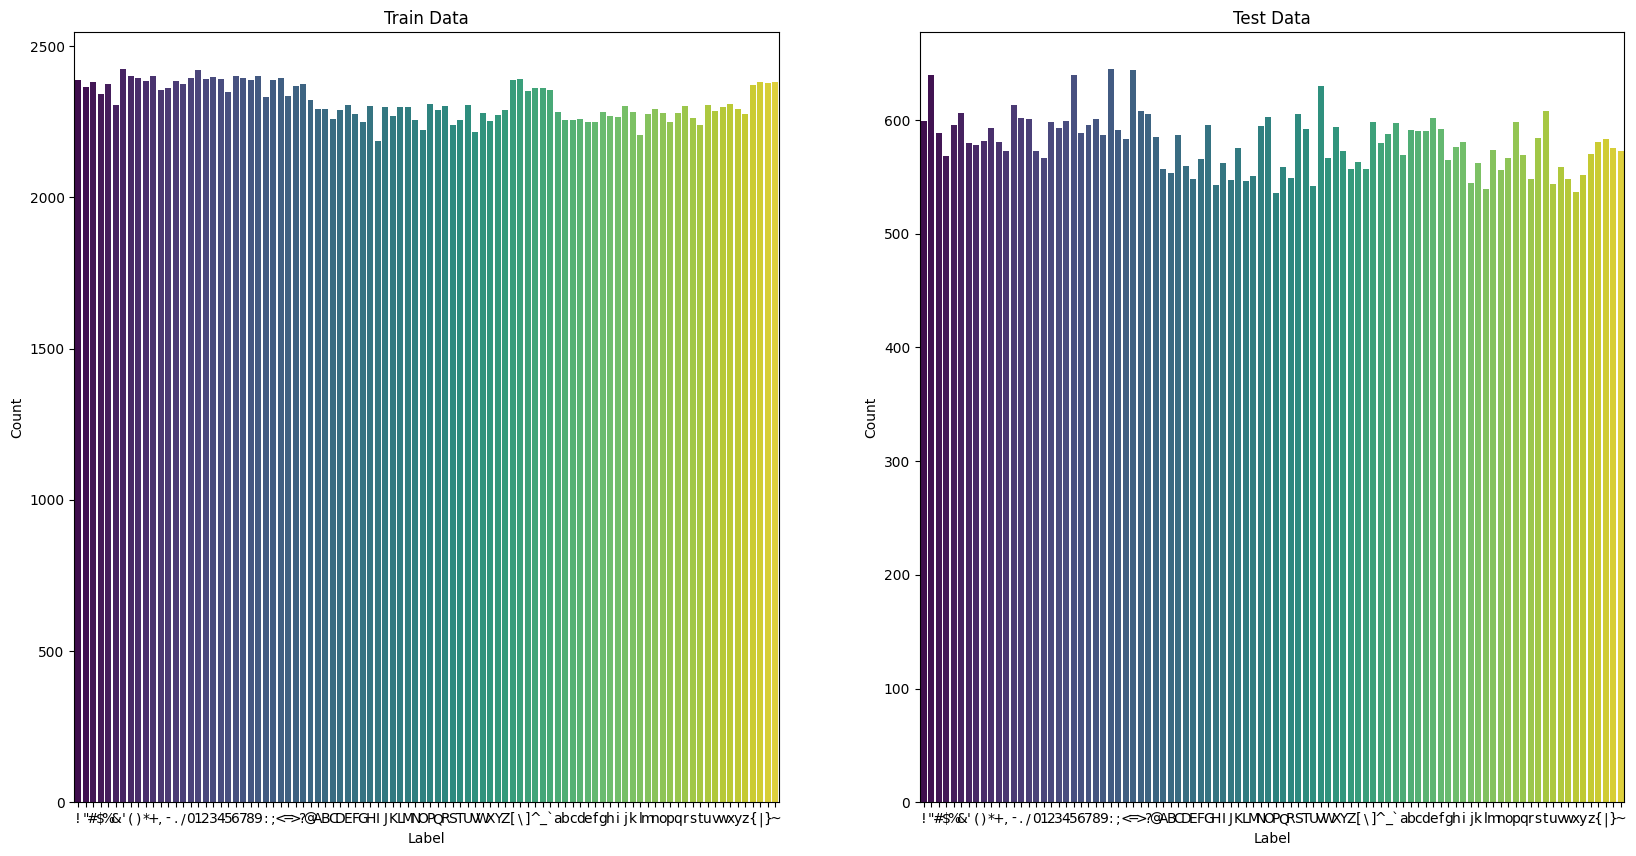

In [23]:
# Creating a bar chart displaying the distribution of labels in the training and testing datasets
# Subplots are used to display both training and testing distributions side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Calculating the count of each unique label in the training and testing datasets
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

# Creating bar plots for the training and testing distributions with a color gradient using the 'viridis' colormap
ax = sns.barplot(x=unique_train, y=counts_train, palette="viridis", ax=ax1)
ax = sns.barplot(x=unique_test, y=counts_test, palette="viridis", ax=ax2)

# Adding labels and titles to each subplot
ax1.set_xlabel('Label')
ax1.set_ylabel('Count')
ax1.set_title('Train Data')

ax2.set_xlabel('Label')
ax2.set_ylabel('Count')
ax2.set_title('Test Data')

# Showing the plot
plt.show()

**Inference:**

We can observe that the there are 2500 data points for each label in the entire data and their distribution in Test, Train.
They seem to be distributed evenly with minimal Bias in the data

In [24]:
# Extracting the first 9 digits from the training set for visualization
first_9_digits = X_train[0:9]

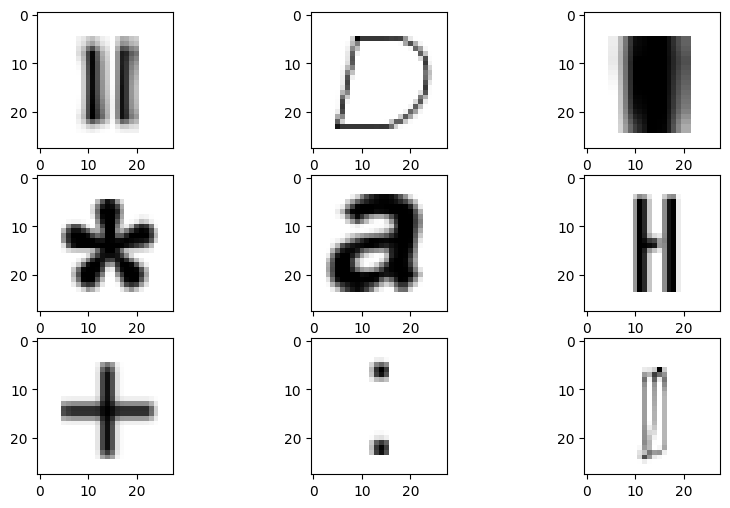

In [25]:
# Plotting the images
fig, ax = plt.subplots(3,3,figsize=(10,6))

ax[0,0].imshow(first_9_digits[0], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[0,1].imshow(first_9_digits[1], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[0,2].imshow(first_9_digits[2], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[1,0].imshow(first_9_digits[3], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[1,1].imshow(first_9_digits[4], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[1,2].imshow(first_9_digits[5], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[2,0].imshow(first_9_digits[6], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[2,1].imshow(first_9_digits[7], cmap = matplotlib.cm.binary, interpolation = 'nearest')
ax[2,2].imshow(first_9_digits[8], cmap = matplotlib.cm.binary, interpolation = 'nearest')


Here we are generating a grid of subplots displaying a selection of images. The first_9_digits variable likely contains an array of image data. Using Matplotlib, it arranges these images in a 3x3 grid, each subplot representing one image. The imshow function is used to display each image, with parameters specifying the colormap (cmap) for grayscale, and the interpolation method to render the images (interpolation). The result is a visual representation of the images contained in the first_9_digits array of our training data

## **<font color='#ff7B01'>CNN - Convolutional Neural Networks**

Convolutional Neural Networks (CNNs) are a class of deep neural networks primarily designed to analyze visual imagery. They excel in tasks like image classification, object detection and image segmentation. CNNs leverage a hierarchical pattern recognition approach inspired by the human visual system.

In data science, CNNs are widely used due to their ability to automatically learn features from raw data, making them effective in tasks involving images, videos and even sequential data like time-series. Their hierarchical structure allows them to capture intricate patterns and relationships within data, making them robust in handling complex real-world scenarios.

Mathematically, CNNs utilize convolutional layers to apply filters (also called kernels) across input data, extracting features such as edges, textures and shapes. These filters slide over the input data, performing element-wise multiplications and summations, which effectively convolves the input and extracts relevant features. Pooling layers are then used to reduce the spatial dimensions of the feature maps while retaining essential information, thus improving computational efficiency and reducing overfitting.

CNNs also incorporate activation functions, such as ReLU (Rectified Linear Unit), to introduce non-linearities and enable the network to learn complex mappings between input and output. Additionally, they utilize techniques like padding and stride to control the size of the output volumes and preserve spatial information.

Overall, CNNs revolutionize data science by providing powerful tools for extracting meaningful features from complex data, enabling accurate predictions and insights across various domains.

In [26]:
# CNN Model with layers
cnnModel = Sequential([
    # First convolutional layer with 32 filters, each with a 3x3 kernel, using ReLU activation function
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Second convolutional layer with 32 filters, each with a 3x3 kernel, using ReLU activation function
    Conv2D(32, (3, 3), activation='relu'),
    # Max pooling layer with a 2x2 pool size
    MaxPooling2D((2,2)),
    # Third convolutional layer with 64 filters, each with a 3x3 kernel, using ReLU activation function
    Conv2D(64, (3, 3), activation='relu'),
    # Fourth convolutional layer with 64 filters, each with a 3x3 kernel, using ReLU activation function
    Conv2D(64, (3, 3), activation='relu'),
    # Max pooling layer with a 2x2 pool size
    MaxPooling2D((2,2)),
    # Flatten layer to convert 2D feature maps to 1D feature vectors
    Flatten(),
    # Dropout layer to prevent overfitting by randomly setting 50% of input units to 0 at each update
    Dropout(0.5),
    # Fully connected dense layer with 512 neurons, using ReLU activation function
    Dense(512, activation='relu'),
    # Dropout layer to prevent overfitting by randomly setting 50% of input units to 0 at each update
    Dropout(0.5),  
    # Output layer with 94 neurons and softmax activation function for multi-class classification
    Dense(94, activation='softmax')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### Model Working

1. **Convolutional Layers**:
   - `Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))`: First convolutional layer with 32 filters, each using a 3x3 kernel, ReLU activation function, and an input shape of (28, 28, 1) representing grayscale images.
   - `Conv2D(32, (3, 3), activation='relu')`: Second convolutional layer with 32 filters and ReLU activation.
   - `Conv2D(64, (3, 3), activation='relu')`: Third convolutional layer with 64 filters and ReLU activation.
   - `Conv2D(64, (3, 3), activation='relu')`: Fourth convolutional layer with 64 filters and ReLU activation.

2. **Pooling Layers**:
   - `MaxPooling2D((2, 2))`: Max pooling layers to reduce spatial dimensions by half after certain convolutional layers.

3. **Flatten Layer**:
   - `Flatten()`: Layer to flatten the output of the convolutional layers into a 1D array for input to the fully connected layers.

4. **Dropout Layers**:
   - `Dropout(0.5)`: Dropout layers with a dropout rate of 0.5, intended to prevent overfitting by randomly dropping 50% of input units during training.

5. **Dense (Fully Connected) Layers**:
   - `Dense(512, activation='relu')`: Fully connected layer with 512 neurons and ReLU activation.
   - `Dense(94, activation='softmax')`: Final fully connected layer with 10 neurons, representing classes in the dataset, and using softmax activation for multi-class classification.

In [27]:
# Specifying optimizer, loss function, and metrics for the CNN model
# by using the Adam optimizer, categorical crossentropy as the loss function 
# and accuracy as the evaluation metric
cnnModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Here we are configuring a Convolutional Neural Network (CNN) model for training. It specifies the Adam optimizer for gradient descent, categorical crossentropy as the loss function for multi-class classification tasks, and accuracy as the evaluation metric to monitor during training. This setup enables efficient model optimization and performance assessment during the training process.

In [28]:
!pip install pydot

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


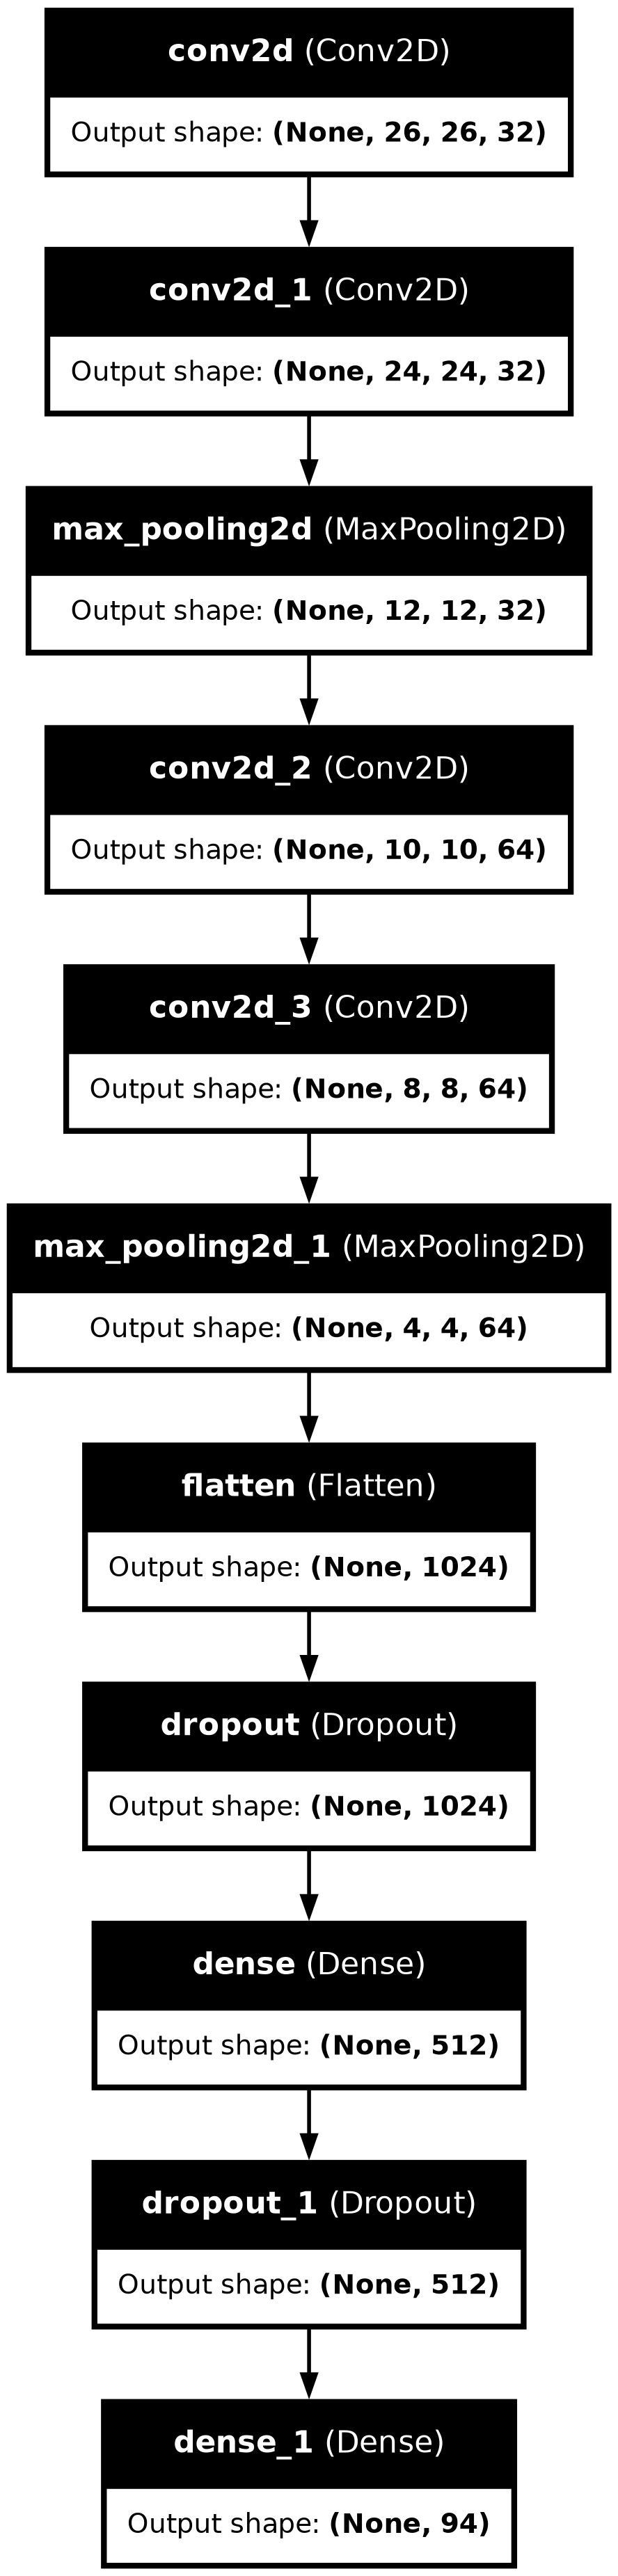

In [29]:
# Generating a visualization of the CNN model architecture and 
#saved as an image file named 'model_graph.png'
plot_model(cnnModel, to_file='model_graph.png', show_shapes=True, show_layer_names=True)

This code generates a visualization of the architecture of a Convolutional Neural Network (CNN) model. It creates a graphical representation with detailed information about each layer's structure and connections.

1. **First Convolutional Layer (`conv2d_12`):**
   - This layer uses a Conv2D operation with 32 output filters, a kernel size of (3, 3), and presumably a 'same' padding (since the output size reduces from 28x28 to 26x26). It has 320 parameters, which are the weights and biases for the filters applied to the input image.

2. **Second Convolutional Layer (`conv2d_13`):**
   - Another Conv2D layer follows up with 32 filters of size (3, 3). It processes the result of the previous layer, further reducing the output shape to 24x24 and involving 9,248 parameters, which indicates more feature extraction from the input provided by the first layer.

3. **First Max Pooling Layer (`max_pooling2d_6`):**
   - This layer applies max pooling with a pool size of (2, 2), reducing the spatial dimensions by half (to 12x12). Max pooling helps to make the representation smaller and more manageable and introduces translational invariance by boiling down the outputs of the convolutional layers to their most essential elements.

4. **Third Convolutional Layer (`conv2d_14`):**
   - With a bump-up in filter count to 64 and a (3, 3) kernel, this Conv2D layer processes the pooled data, resulting in a 10x10 feature map and having 18,496 parameters.

5. **Fourth Convolutional Layer (`conv2d_15`):**
   - Another Conv2D layer with 64 filters maintains the progression of feature extraction, leaving an 8x8 output and involving 36,928 parameters.

6. **Second Max Pooling Layer (`max_pooling2d_7`):**
   - The max pooling operation is applied once again, further reducing the spatial dimension to 4x4.

7. **Flatten Layer (`flatten_3`):**
   - Post the convolutions and subsampling, the Flatten layer is used to convert the 2D feature maps into a 1D vector (flat array) of 1024 elements, enabling the data to be fed into the dense layers that follow.

8. **Dropout Layer (`dropout_6`):**
   - To help prevent overfitting, a Dropout layer is included which randomly sets input units (neurons) to 0 at a rate of 0.5 during training.

9. **First Dense Layer (`dense_6`):**
   - This fully connected layer has 512 units with ReLU activation and is responsible for the high-level reasoning in the neural network, involving 524,800 parameters, suggesting a complex layer with many learned weights.

10. **Dropout Layer (`dropout_7`):**
    - The second Dropout layer continues to aid in preventing overfitting, applying the same disabling of neurons during training.

11. **Output Layer (`dense_7`):**
    - The final layer is a dense layer with 94 units and a softmax activation function, which is standard for multi-class classification problems, such as distinguishing between 10 different classes. It has 5,130 parameters.

In [30]:
# Convert y_train and y_test labels from categorical to numeric using the normal mapping
# This is necessary for compatibility with some machine learning models
y_train_numeric = np.array([normal_mapping[label] for label in y_train.ravel()])
y_test_numeric = np.array([normal_mapping[label] for label in y_test.ravel()])


Here we are convertsing categorical labels from 'y_train' and 'y_test' into numeric values using a predefined mapping. 

The 'normal_mapping' dictionary is used to map each categorical label to a corresponding numeric value. This conversion is essential for compatibility with certain machine learning models that require numeric input labels.

In [31]:
# Convert the numeric labels to one-hot encoded categorical labels
y_train_categorical = to_categorical(y_train_numeric)
y_test_categorical = to_categorical(y_test_numeric)

Here we are converting the numeric labels into one-hot encoded categorical labels. 

One-hot encoding is a process that converts categorical labels into a binary matrix, where each label is represented by a row containing all zeros except for the column corresponding to the label, which is marked with a one. 

This encoding is often used for multi-class classification tasks, ensuring compatibility with neural network models. 

The resulting one-hot encoded categorical labels are stored in 'y_train_categorical' and 'y_test_categorical' arrays for model training and evaluation.

In [32]:
# Define the number of epochs for training
epochs = 20
# Define the batch size for training for my dataset
batch_size = 64
# Early stopping to prevent overfitting by monitoring validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min', restore_best_weights=True)
# Train the CNN model using the training data
history = cnnModel.fit(X_train, y_train_categorical, validation_split=0.2, epochs=epochs, batch_size=batch_size, callbacks=[early_stopping], verbose=1)

Epoch 1/20
2726/2726 ━━━━━━━━━━━━━━━━━━━━ 216s 79ms/step - accuracy: 0.6892 - loss: 1.1926 - val_accuracy: 0.9097 - val_loss: 0.2827
Epoch 2/20
2726/2726 ━━━━━━━━━━━━━━━━━━━━ 260s 78ms/step - accuracy: 0.8925 - loss: 0.3531 - val_accuracy: 0.9297 - val_loss: 0.2217
Epoch 3/20
2726/2726 ━━━━━━━━━━━━━━━━━━━━ 210s 77ms/step - accuracy: 0.9089 - loss: 0.2946 - val_accuracy: 0.9335 - val_loss: 0.2037
Epoch 4/20
2726/2726 ━━━━━━━━━━━━━━━━━━━━ 209s 77ms/step - accuracy: 0.9171 - loss: 0.2629 - val_accuracy: 0.9378 - val_loss: 0.1896
Epoch 5/20
2726/2726 ━━━━━━━━━━━━━━━━━━━━ 208s 76ms/step - accuracy: 0.9225 - loss: 0.2457 - val_accuracy: 0.9383 - val_loss: 0.1870
Epoch 6/20
2726/2726 ━━━━━━━━━━━━━━━━━━━━ 261s 76ms/step - accuracy: 0.9247 - loss: 0.2356 - val_accuracy: 0.9417 - val_loss: 0.1787
Epoch 7/20
2726/2726 ━━━━━━━━━━━━━━━━━━━━ 262s 76ms/step - accuracy: 0.9279 - loss: 0.2256 - val_accuracy: 0.9394 - val_loss: 0.1802
Epoch 8/20
2726/2726 ━━━━━━━━━━━━━━━━━━━━ 209s 77ms/step - accuracy: 

This snippet is crucial for training the Convolutional Neural Network (CNN) model. It establishes key training parameters such as:

* Epochs: The variable epochs determines how many times the entire dataset will be fed forward and backward through the network during training. Increasing epochs can enhance model learning but may lead to overfitting if set excessively.

* Batch Size: It specifies the number of samples processed before the model's parameters are updated. A smaller batch size consumes less memory but may result in slower convergence, while a larger batch size can speed up training but might reduce generalization.

* Early Stopping: To prevent the model from overfitting, early stopping is employed. It monitors the validation loss, halting training if the loss stops improving for a certain number of epochs (patience). The restore_best_weights parameter ensures the model reverts to its best state.

* Training: The fit() function trains the CNN model using the provided training data (X_train and y_train_categorical). Additionally, a validation split of 20% (validation_split=0.2) is used for monitoring the model's performance during training. Callbacks, including early stopping, are passed to the callbacks parameter, and training progress is printed (verbose=1) to track the process.

This setup enables effective training of the CNN model while guarding against overfitting, ensuring it learns meaningful patterns from the data.

In [33]:
# Evaluating the trained model using the correctly processed test labels
test_loss, test_accuracy = cnnModel.evaluate(X_test, y_test_categorical, verbose=0)
# Printing the test accuracy as a percentage
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Test Accuracy: 94.81%


The test accuracy achieved is 94.81%, indicating the model's performance on unseen data.

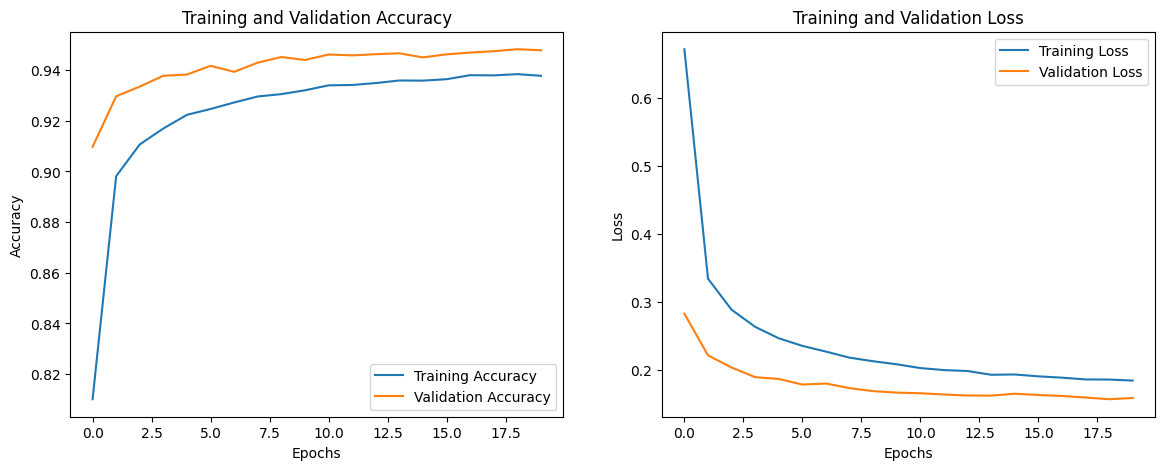

In [34]:
# Plotting training history to visualize the training and validation accuracy/loss
plt.figure(figsize=(14, 5))

# Subplot for training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Subplot for training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

**Observations:**

* The training and validation loss graph shows a decrease in loss for both training and validation as the epochs increase. 
* The training loss decreases more sharply and continues to remain lower than the validation loss. This is typical, as the model is trained to minimize the loss on the training data. 
* The validation loss decreases and flattens out, which is a good sign that the model is generalizing well to unseen data. However, if the validation loss starts to increase while the training loss continues to decrease, that would be a sign of overfitting.

Overall, these graphs indicate that the model is learning and generalizing well up to the current number of epochs.

## **<font color='#ff7B01'>Conclusion**

**Model Architecture:** The Convolutional Neural Network (CNN) model architecture consists of multiple convolutional layers followed by max-pooling layers for feature extraction and spatial reduction. It also includes dropout layers for regularization and fully connected dense layers for classification.

**Training Parameters:** The model is trained using the Adam optimizer with categorical crossentropy loss and accuracy as the evaluation metric. Early stopping is employed to prevent overfitting by monitoring the validation loss.

**Training Performance:** During training, the model achieves significant improvements in both training and validation accuracy, indicating effective learning. The validation loss decreases consistently, suggesting good generalization to unseen data.

**Evaluation:** The model achieves a high test accuracy of **94.81%**, demonstrating its ability to accurately classify unseen samples.

**Training History Visualization:** The plots of training and validation accuracy/loss show typical behavior for a well-trained model. Both training and validation accuracy increase over epochs, while the loss decreases. The validation loss flattens out, indicating good generalization.

**Conclusion:** Overall, the CNN model demonstrates strong performance in both training and evaluation phases, achieving high accuracy and effectively generalizing to unseen data. The training history plots indicate successful learning without overfitting. This suggests that the model has effectively learned meaningful patterns from the data and can reliably classify images into their respective classes.

## **<font color='#ff7B01'>References**

https://www.kaggle.com/nimishmagre/tmnist-glyphs-1812-characters
https://www.kaggle.com/code/sheshngupta/tminst-character-recognition-94-4-accuracy
https://chat.openai.com (for comments)

## **<font color='#ff7B01'>License**

MIT License

Copyright (c) 2024 Anusha Gali

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.